# 机器学习-线性回归

## 一元线性回归

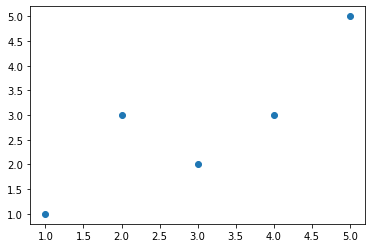

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([1,2,3,4,5],dtype=np.float)
y=np.array([1,3.0,2,3,5],dtype=np.float)
plt.scatter(x,y)


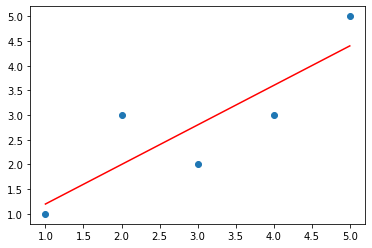

In [9]:
x_mean=np.mean(x)
y_mean=np.mean(y)
num=0.0
d=0.0
for x_i,y_i in zip(x,y):
    num+=(x_i-x_mean)*(y_i-y_mean)
    d+=(x_i-x_mean)**2
    a=num/d
    b=y_mean-a*x_mean
y_hat=a*x+b

plt.figure(2)
plt.scatter(x,y) #描绘散点
plt.plot(x,y_hat,c='r') #描绘直线
# x_predict=4.8 #取随机点x_predict
# y_predict=a*x_predict+b #开始预测 y_predict
# plt.scatter(x_predict,y_predict,c='b',marker='+')

## 多元线性回归(批梯度下降)

### 数据准备

In [27]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target.reshape((-1,1))
X_train, X_test, y_train, y_test = train_test_split( data, target, test_size=0.3, random_state=2020)
print('X_train=', X_train.shape)
print('X_test=', X_test.shape)
print('y_train=', y_train.shape)
print('y_test=', y_test.shape)

X_train= (309, 10)
X_test= (133, 10)
y_train= (309, 1)
y_test= (133, 1)


### 模型函数

In [28]:
def linar_train(X, y, learning_rate=0.01, epochs=30000):
    w, b = initialize(X.shape[1])  #初始化参数
    for i in range(1, epochs):
        y_hat, loss, dw, db = linar_loss(X, y, w, b)
        w += -learning_rate * dw
        b += -learning_rate * db
        
        if i % 10000 == 0:
            print('epoch %d loss %f' % (i, loss))
        
        params = {
            'w': w,
            'b': b
        }
        
        grads = {
            'dw': dw,
            'db': db
        }
            
    return loss, params, grads

In [29]:
def initialize(dims):
    """
    将线性回归中w全部初始化为0
    w为dims行 1列的0矩阵
    """
    w = np.zeros((dims, 1))
    b = 0
    return w, b

In [30]:
def linar_loss(X, y, w, b):
    """
    计算损失函数
    num_train为数据集的数目
    num_feature为数据特征数
    y_hat为预测的y值
    loss 计算均方误差
    """
    num_train = X.shape[0]
    num_feature = X.shape[1]
    
    y_hat = np.dot(X, w) + b
    loss = np.sum((y_hat-y)**2)/num_train  #计算均方误差
    dw = np.dot(X.T, (y_hat-y)) /num_train #X.T矩阵转置
    db = np.sum((y_hat-y)) /num_train
    return y_hat, loss, dw, db

In [32]:
loss, params, grads = linar_train(X_train, y_train, 0.001, 500000)

epoch 10000 loss 5466.701039
epoch 20000 loss 5158.812162
epoch 30000 loss 4897.007276
epoch 40000 loss 4673.682172
epoch 50000 loss 4482.527508
epoch 60000 loss 4318.306109
epoch 70000 loss 4176.668710
epoch 80000 loss 4054.001490
epoch 90000 loss 3947.299879
epoch 100000 loss 3854.064131
epoch 110000 loss 3772.212886
epoch 120000 loss 3700.011618
epoch 130000 loss 3636.013411
epoch 140000 loss 3579.009922
epoch 150000 loss 3527.990784
epoch 160000 loss 3482.109981
epoch 170000 loss 3440.658006
epoch 180000 loss 3403.038800
epoch 190000 loss 3368.750634
epoch 200000 loss 3337.370283
epoch 210000 loss 3308.539897
epoch 220000 loss 3281.956119
epoch 230000 loss 3257.361060
epoch 240000 loss 3234.534816
epoch 250000 loss 3213.289248
epoch 260000 loss 3193.462826
epoch 270000 loss 3174.916345
epoch 280000 loss 3157.529355
epoch 290000 loss 3141.197205
epoch 300000 loss 3125.828573
epoch 310000 loss 3111.343409
epoch 320000 loss 3097.671228
epoch 330000 loss 3084.749672
epoch 340000 loss 3

In [33]:
params

{'w': array([[  18.12432661],
        [-107.67245554],
        [ 404.37142851],
        [ 226.28953116],
        [ -10.89733854],
        [ -76.80225482],
        [-174.88980099],
        [ 126.33236945],
        [ 353.19542078],
        [ 170.24624517]]),
 'b': 151.95335186539964}

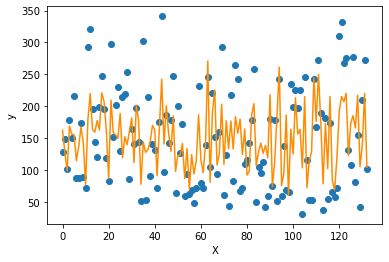

In [34]:
import matplotlib.pyplot as plt
f = X_test.dot(params['w']) + params['b']

plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color = 'darkorange')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## sklearn

In [37]:
from sklearn.linear_model import LinearRegression  # 线性回归
model = LinearRegression()
model.fit(X_train, y_train)   # 线性回归建模
print('系数矩阵:\n',model.coef_)

系数矩阵:
 [[ -52.75610651 -208.56532572  522.94318327  267.48774097 -628.34615192
   315.01607857   74.60530294  153.93310948  720.64424408  113.35236313]]


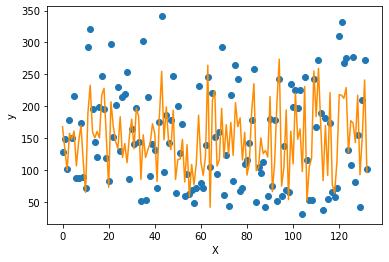

In [40]:
predicted = model.predict(X_test)

plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(predicted, color = 'darkorange')
plt.xlabel('X')
plt.ylabel('y')
plt.show()